# Lab 12 Building Parsimonious Models - [25 points] - Solutions


## <u>Case Study</u>: Creating an Classifer Model that will Accurately Predict whether an Instagram Account is Fake or Real *with New Data*

We will revisit the fake_insta_cleaned.csv dataset one more time with a different research goal in mind now. In lab 11, we assess how well our model would be at preciting fake accounts in the just the *dataset that we were given*. Now, we would like to build a model that will make accurate predictions *for new datasets*.

We will build a logistic regression model that predicts the probability that an account is fake, using the following explanatory variables.
* the number of accounts someone *follows*
* number of *followers*
* number of posts
* number of words in name
* number of characters in the bio
* whether they have a profile picture or not




## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Data Preliminaries
### 1.1 [0.5 pt] Read the fake_insta_cleaned.csv into a dataframe called df.

In [2]:
df = pd.read_csv('fake_insta_cleaned.csv')

In [3]:
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real


### 1.2. [0.5 pt] Next, create a new variable y in df that is equal to 1 when the the account is fake and that is equal to 0 when the account is real.

In [4]:
df['y'] = df['account_type'].map({'fake': 1, 'real' : 0})
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y
0,yes,1,30,35,488,604,real,0
1,yes,5,64,3,35,6,real,0
2,yes,2,82,319,328,668,real,0
3,yes,1,76,6,225,356,real,0
4,yes,1,0,6,362,424,real,0


## 2. Training and Test Data

First, we want to create a training dataset to train the dataset and a test dataset to test the model's performance.

### 2.1. [2 pts] First, create a training dataset and a test dataset where:
* the training dataset is comprised of a random sample of 85% of the rows in our dataframe,
* the test dataset is comprised of the remaining 15% of rows in the dataframe, and
* we use a random state of 456.

In [5]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df,test_size = .15, random_state = 456)

In [6]:
df_train.shape[0]/df.shape[0]

0.8482142857142857

In [7]:
df_test.shape[0]/df.shape[0]

0.15178571428571427

## 3. Full Model

Next, we would like for our 'full model' to predict the probability that an account is fake, using ALL of the following available explanatory variables.
* the number of accounts someone *follows*
* number of *followers*
* number of posts
* number of words in name
* number of characters in the bio
* whether they have a profile picture or not

### 3.1. [1 pt] Fit the full model with all six of these explanatory variables using just your *training dataset*.

In [8]:
training_model = smf.logit('y ~ number_of_follows + number_of_followers + number_of_posts + number_of_words_in_name + num_characters_in_bio + has_a_profile_pic', data = df_train).fit()
training_model.summary()

         Current function value: 0.122645
         Iterations: 35


/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 May 2021   Pseudo R-squ.:                  0.8227
Time:                        00:25:27   Log-Likelihood:                -11.651
converged:                      False   LL-Null:                       -65.717
Covariance Type:            nonrobust   LLR p-value:                 5.015e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  106.9158    1.2e+05      0.001      0.999   -2.35e+05    2.35e+05
has_a_profile_pic[T.yes]  -101.7707    1.2e+05     -0.001      0.999   -2.35e+05    2.35e+05
number_of_follows            0.0098      0.003      3.168      0.002       0.004       0.016
number_of_followers         -0.0299      0.010     -3.107      0.002      -0.049      -0.011
number_of_posts              0.0084      0.009      0.973      0.331      -0.009       0.025
number_of_words_in_name     -1.4222      0.621     -2.290      0.022      -2.640      -0.205
num_characters_in_bio       -0.1171      0.053     -2.201      0.028      -0.221      -0.013
============================================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## 4.  [4 pts]  Backwards Elimination

Next, starting with the full model, use a backwards elimination algorithm that seeks to find the model with the lowest **AIC** score. You should fit each of these models in the algorithm with *just the training dataset*. Once the algorithm has stopped, print out the summary output of your **final model**. 

In [9]:
no_num_follows = smf.logit('y ~ number_of_followers + number_of_posts + number_of_words_in_name + num_characters_in_bio + has_a_profile_pic', data = df_train).fit()

         Current function value: 0.331365
         Iterations: 35


/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
print('AIC for model with number of follows slope removed',no_num_follows.aic)

AIC for model with number of follows slope removed 74.95943769115172


In [11]:
no_num_followers = smf.logit('y ~ number_of_follows + number_of_posts + number_of_words_in_name + num_characters_in_bio + has_a_profile_pic', data = df_train).fit()

         Current function value: 0.276135
         Iterations: 35


/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
print('AIC for model with number of followers slope removed', no_num_followers.aic)

AIC for model with number of followers slope removed 64.4657256333045


In [13]:
no_num_posts = smf.logit('y ~ number_of_follows + number_of_followers + number_of_words_in_name + num_characters_in_bio + has_a_profile_pic', data = df_train).fit()

         Current function value: 0.125481
         Iterations: 35


/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
print('AIC for model with number of posts slope removes',no_num_posts.aic)

AIC for model with number of posts slope removes 35.841371446640366


In [15]:
no_num_name_words = smf.logit('y ~ number_of_follows + number_of_followers + number_of_posts + num_characters_in_bio + has_a_profile_pic', data = df_train).fit()

         Current function value: 0.150957
         Iterations: 35


/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
print('AIC for model with number of words in name slope removed',no_num_name_words.aic)

AIC for model with number of words in name slope removed 40.681911322586714


In [17]:
no_num_char_bio = smf.logit('y ~ number_of_follows + number_of_followers + number_of_posts + number_of_words_in_name + has_a_profile_pic', data = df_train).fit()

         Current function value: 0.206117
         Iterations: 35


/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
print('AIC for model with number of characters in bio slope removed',no_num_char_bio.aic)

AIC for model with number of characters in bio slope removed 51.16232420711869


In [19]:
no_prof_pic = smf.logit('y ~ number_of_follows + number_of_followers + number_of_posts + number_of_words_in_name + num_characters_in_bio', data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.329550
         Iterations 9


In [20]:
print('AIC for model with has a profile pic slope removed', no_prof_pic.aic)

AIC for model with has a profile pic slope removed 74.61454076684927


In [21]:
no_num_posts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 May 2021   Pseudo R-squ.:                  0.8186
Time:                        00:27:34   Log-Likelihood:                -11.921
converged:                      False   LL-Null:                       -65.717
Covariance Type:            nonrobust   LLR p-value:                 1.321e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.9262   2.29e+05      0.000      1.000    -4.5e+05     4.5e+05
has_a_profile_pic[T.yes]   -98.8981   2.29e+05     -0.000      1.000    -4.5e+05     4.5e+05
number_of_follows            0.0093      0.003      3.211      0.001       0.004       0.015
number_of_followers         -0.0284      0.009     -3.146      0.002      -0.046      -0.011
number_of_words_in_name     -1.3617      0.606     -2.246      0.025      -2.550      -0.173
num_characters_in_bio       -0.1060      0.050     -2.141      0.032      -0.203      -0.009
============================================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## 5. Parsimonious Model Evaluation

### 5.1.  [2 pt]  Compare the BIC score from your final model (from 4) to your full model (from 3). Use the BIC score to assess which of these models is more of a parsimonious model.

In [22]:
print('full model BIC:',training_model.bic)

full model BIC: 55.17960783224504


In [23]:
print('reduced model BIC:',no_num_posts.bic)

reduced model BIC: 51.16463279624361


The BIC score for the reduced model is lower, so it is more of a parsimonious model than the full model

### 5.2. Perform a log likelihood ratio test, where your full model (from 3) is your full model and your reduced model is your "final model" (from 4).

#### 5.2.1.  [1.5 pt]  Set up your hypotheses for this test below.

$H_0$ : The reduced model is correct


$H_A$ : The reduced model is incorrect because at least one missing coefficient is non-zero

#### 5.2.2.  [2 pt]  Calculate the test statistic for this test.

In [24]:
test_stat = -2 * (no_num_posts.llf - training_model.llf)
print('test stat:', test_stat)

test stat: 0.5389018555991143


#### 5.2.3.  [2pt]  Calculate the p-value for this test.

The degrees of freedom that we use for this test is df=q=1, which represents the number of slopes that are in the full model, but not in the reduced model.

In [25]:
from scipy.stats import chi2

1 - chi2.cdf(test_stat, df = 1)

0.46288818970651846

#### 5.2.4.  [1.5 pt]  Make a decision about your hypotheses using a significance level of $\alpha=0.05$.

becuase the pvalue is > $\alpha$, we fail to reject the null and say there is not sufficient evidence to suggest the alternative

## 6. More About Models

### 6.1.  [1 pt]  Considering the six possible explanatory variables we *could* include in a logistic regression, how many possible logistic regression models could we create with this dataset?

In [26]:
print('we could create',2**6,'possible regression models with this dataset')

we could create 64 possible regression models with this dataset


### 6.2.  [1.5 pt]  Which of the following logistic regression models would be *less likely* to be overfit the model (using the training data)? Explain.
a. A model that predicts fake accounts using: number_of_followers and number_of_follows? 

b. A model that predicts fake accounts using: num_characters_in_bio and number_of_words_in_name? 

In [27]:
mod_a = smf.logit('y ~ number_of_followers + number_of_follows', data = df_train).fit()
print(mod_a.aic,mod_a.bic)

Optimization terminated successfully.
         Current function value: 0.592487
         Iterations 7
118.57262346255865 126.23425413736027


In [28]:
mod_b = smf.logit('y~num_characters_in_bio + number_of_words_in_name',data = df_train).fit()
print(mod_b.aic,mod_b.bic)

Optimization terminated successfully.
         Current function value: 0.424546
         Iterations 8
86.66376909607207 94.3253997708737


model b would be less liekly to overfit the model using the trianing data set becuase it has both a lower aic and bic score, showing that the explanatory variables that are included contribute enough to log likelihood value to counterbalance the amount of slopes (which in both models is 2)

## 7. Model Testing

Finally, we would like to test our "final model" (from 4) on the **test dataset**.

### 7.1.  [2 pt]  Plot the ROC and calculate the AUC for the "final model" (from 4) with the *test dataset*.

In [29]:
phat_test = no_num_posts.predict(exog = df_test)
phat_test.head(10)

0     0.000435
36    0.000003
75    0.951887
3     0.000575
99    1.000000
29    0.007642
18    0.153684
73    1.000000
76    1.000000
24    0.231045
dtype: float64

In [30]:
df_test['phat_test'] = phat_test
df_test

<ipython-input-30-b413a3cb2275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['phat_test'] = phat_test


,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y,phat_test
0,yes,1,30,35,488,604,real,0,0.000435
36,yes,0,47,2,510,185,real,0,0.000003
75,yes,1,0,0,45,64,fake,1,0.951887
3,yes,1,76,6,225,356,real,0,0.000575
99,no,1,112,4,415,1445,fake,1,1.000000
29,yes,2,0,8,400,449,real,0,0.007642
18,yes,2,39,251,223,694,real,0,0.153684
73,yes,1,0,8,341,2287,fake,1,1.000000
76,no,1,0,0,21,31,fake,1,1.000000
24,yes,1,27,28,116,138,real,0,0.231045


In [31]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

fpr,tpr,score = roc_curve(y_true = df_test['y'],y_score = df_test['phat_test'])

fprs,tprs,thresholds = roc_curve(y_true = df_test['y'],y_score = df_test['phat_test'])


auc = roc_auc_score(y_true = df_test['y'],y_score = df_test['phat_test'])

In [32]:
def plot_roc(fpr,tpr,auc, lw = 2):
    plt.plot(fpr,tpr, color = 'darkorange', lw = lw,
             label = "ROC curve (area = "+str(round(auc,3))+')')
    plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve Mod 1')
    plt.legend(loc = 'lower right')
    plt.show()

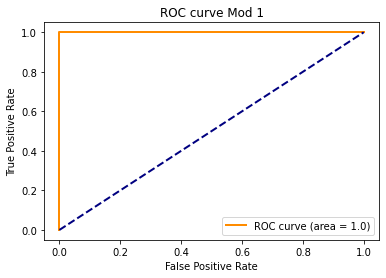

In [33]:
plot_roc(fpr,tpr,auc)

### 7.2.  [1.5 pt]  How effective will this model be at classifying Instagram accounts in the *test dataset*?

This model will be efective in classifying instagram accounts in the test dataset 100% of the time

### 7.3.  [2 pt]  Finally, find a predictive probability threshold that will give you the "best" false positive rate and true positive rate for the *test dataset*.

In [34]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'],df_test['phat_test'],thresh))


   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0       0.01  1.0  0.333333
   threshold  tpr       fpr
0       0.02  1.0  0.333333
   threshold  tpr       fpr
0       0.03  1.0  0.333333
   threshold  tpr       fpr
0       0.04  1.0  0.333333
   threshold  tpr       fpr
0       0.05  1.0  0.333333
   threshold  tpr       fpr
0       0.06  1.0  0.333333
   threshold  tpr       fpr
0       0.07  1.0  0.333333
   threshold  tpr       fpr
0       0.08  1.0  0.333333
   threshold  tpr       fpr
0       0.09  1.0  0.333333
   threshold  tpr       fpr
0        0.1  1.0  0.333333
   threshold  tpr       fpr
0       0.11  1.0  0.333333
   threshold  tpr       fpr
0       0.12  1.0  0.333333
   threshold  tpr       fpr
0       0.13  1.0  0.333333
   threshold  tpr       fpr
0       0.14  1.0  0.333333
   threshold  tpr       fpr
0       0.15  1.0  0.333333
   threshold  tpr       fpr
0       0.16  1.0  0.222222
   threshold  tpr       fpr
0       0.17  1.0  0.222222
  

A threshold level between .86 and .95 would yield a false positive rate of 0 and a true positive rate of 1